# Random small investigations
This notebook contains some small experiments used for shallow investigations mentioned in the paper. 

In [13]:
import torch 
import matplotlib.pyplot as plt

import sys
# to unpickle in this folder
sys.path.append('/home/mailv/documents/output_control/src/')

from utils import load_data

## Activation distributions

In [11]:
all_ = torch.load("../data/activations/Llama-2-7b/mean/mode=all_v3.01.pt").acts
text_ = torch.load("../data/activations/Llama-2-7b/mean/mode=only-text_v3.01.pt").acts
code_ = torch.load("../data/activations/Llama-2-7b/mean/mode=only-code_v3.01.pt").acts
python_ = torch.load("../data/activations/Llama-2-7b/mean/mode=only-python_v2.24.pt").acts

lissie = (all_, text_, code_, python_)
names = ("all", "text", "code", "python")
# layers = (5, 10, 15, 20, 25, 30)
layers = (15,)

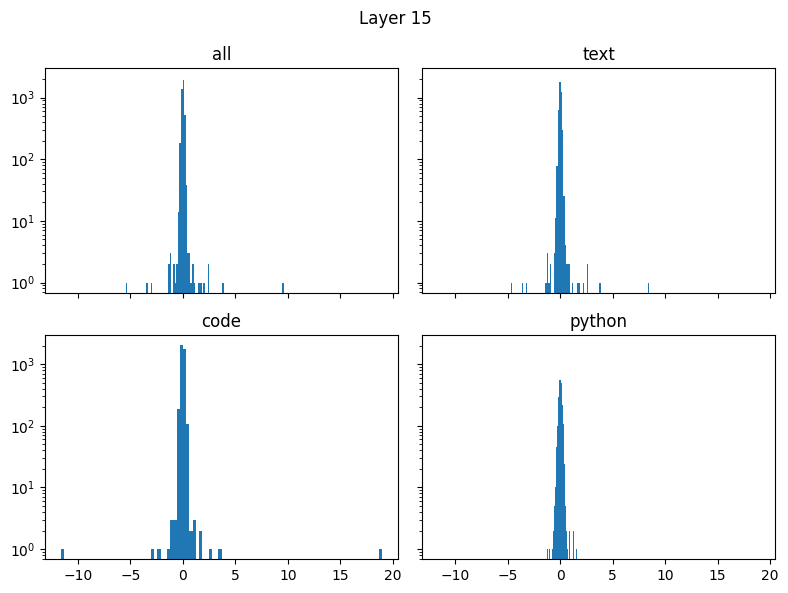

In [12]:

for layer in layers:
    # Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex=True, sharey=True)

    # Flatten the array of axes to easily iterate over it
    axes_flat = axes.flatten()

    # Iterate over the activities in 'lissie' and their corresponding axes
    for name, acts, ax in zip(names, lissie, axes_flat):
        # Create a histogram on the current subplot axis
        ax.hist(acts[layer], bins=100)
        ax.set_yscale('log')
        ax.set_title(name)

    plt.suptitle(f"Layer {layer}")
    # Adjust the layout so that subplots don't overlap
    plt.tight_layout()
    # Display the figure with all subplots
    plt.show()
    plt.close()

## Dataset distribution

In [33]:
only_code_ds = load_data(mode="only_code", split="train")
all_ds = load_data(mode="all", split="train")
only_text_ds = load_data(mode="only_text", split="train")
only_python_ds = load_data(mode="only_python", split="train")

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

dataset_namecodeparrot/codeparrot-clean


Resolving data files:   0%|          | 0/54 [00:00<?, ?it/s]

In [35]:
for i, sample in enumerate(only_python_ds):
    print(f"\n----------\n{sample['content'][:100]}") # or key is 'text' for all other datasets
    # break
    if i > 100:
        break



----------
"""
Provides exceptions classes
"""
__copyright__ = "Copyright 2015, Datera, Inc."

import json
impo

----------
# Copyright (c) 2010-2012 OpenStack Foundation
#
# Licensed under the Apache License, Version 2.0 (t

----------
from .note import Note
from .sfx import Sfx

from . import PICO8_NUM_SFX

# SfxCompactor does the fo

----------
from routes import Mapper

def make_map(config):
    """Create, configure and return the routes Mapp

----------
import scraperwiki
import lxml.html
import re
import urllib
import pprint

# Reads list of bills fro

----------
from thrift.transport.TTransport import TTransportBase

from ..compat import BytesIO
from ..http.sin

----------
import os
import sys
import logfetch_base
import requests
import time
import fnmatch
import threadin

----------
import sys, getopt
from pyral import Rally, rallySettings
import unicodedata
import re
import dateti

----------
import getpass
import json
from collections import OrderedDict
from datetime import 